## Pandas Library


Pandas is a library specially for the data analysis , it is built using numpy.
<br/>
For importing the pandas we use "import pandas as pd".
<br/>
                                               

## Key Features

1. DataFrame : Fast and efficient objects.
<br/>
2. Loading data from different file formats.
<br/>
3. Data alignment and integrated handling of the missing data.
<br/>
4. Reshaping and pivot tables.
<br/>
5. index and label based slicing and subsetting.
<br/>
6. Groupby Functionality.
<br/>
7. Functionality to handle time series data.
<br/>
8. Mutable Data Structure.
<br/>
9. Can do various statistical operations on the data frame.
<br/>
10. data visualization    

### Basics of Pandas

Pandas has two main data structures
<br/>
1. Series
2. DataFrames : These are the most commonly used data structures.

Dataframes are the tables with rows and columns where we can perform multiple operations, we can create dataframes using multiple ways , from dictionaries , csv files , excel files etc.

### Creating dataframes using dictionaries

The key in dictionary acts as the column name , whereas the values stored in it acts as values of those columns.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd

In [2]:
# creating the list 
cars_per_cap = [809,731,588,18]
country=['us','ind','braz','jap']
drives_right=[True,True,False,True]


In [3]:
# creating a dict from above lists:
my_dict = {'cars_per_cap':cars_per_cap,'country':country,'drives_right':drives_right}

In [4]:
print(my_dict)

{'cars_per_cap': [809, 731, 588, 18], 'country': ['us', 'ind', 'braz', 'jap'], 'drives_right': [True, True, False, True]}


In [5]:
type(my_dict)

dict

In [6]:
# converting it to dataframe
df = pd.DataFrame(my_dict)

In [7]:
df

,cars_per_cap,country,drives_right
0,809,us,True
1,731,ind,True
2,588,braz,False
3,18,jap,True


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
type(df.country)

pandas.core.series.Series

In [10]:
# the dataframe is the combination of series 

In [11]:
# Another way to create the dataframe is to load the files from an external source
cars_df = pd.read_csv(r"F:\IIITBangloreAIML\3. Python Bootcamp\datasets\cars.csv")


In [12]:
cars_df

,USCA,US,United States,809,FALSE
0,ASPAC,AUS,Australia,731.0,True
1,ASPAC,JAP,Japan,588.0,True
2,ASPAC,IN,India,18.0,True
3,ASPAC,RU,Russia,200.0,False
4,LATAM,MOR,Morocco,70.0,False
5,AFR,EG,Egypt,45.0,False
6,EUR,ENG,England,NaN,True


##### here we can see that the read_csv method treated the first line as the header , so inorder to stop it we need to explicitly tell the method to set the header as None

In [13]:
cars_df = pd.read_csv(r"F:\IIITBangloreAIML\3. Python Bootcamp\datasets\cars.csv",header=None)

In [14]:
cars_df

,0,1,2,3,4
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


##### Now the columns are set as Numbers 

In [15]:
# let's see the columns
cars_df.columns

Index([0, 1, 2, 3, 4], dtype='int64')

In [16]:
# renaming the columns
cars_df.columns = ['country_code','region','country','cars_per_cap','drives_right']

In [17]:
print(cars_df.columns.tolist())

['country_code', 'region', 'country', 'cars_per_cap', 'drives_right']


In [18]:
cars_df

,country_code,region,country,cars_per_cap,drives_right
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


## Pandas rows and columns

### In Pandas, DataFrames have row indices and column indices, which help in data access and manipulation.<br/>

## Row Indices
####  By default, rows are assigned indices starting from 0, displayed on the left of the DataFrame.
####  These indices help in selecting, slicing, and modifying rows.
####  Custom indices can also be assigned using the set_index() function.
## Column Indices
####  The first row in the dataset is typically used as column headers (i.e., column indices).
####  If no header is provided, Pandas assigns default column indices starting from 0, similar to row indices.

In [19]:
# to see the index
cars_df.index

RangeIndex(start=0, stop=8, step=1)

#### Read the file and set the first column as the index (index_col)

In [20]:
cars_df = pd.read_csv(r"F:\IIITBangloreAIML\3. Python Bootcamp\datasets\cars.csv",header=None,index_col=0)

In [21]:
cars_df

,1,2,3,4
0,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


#### for reading the file and setting the column as index we use index_col 

##### renaming the index name -> DataFrame.index.name

In [22]:
cars_df.index.name = 'Country_Code'

In [23]:
cars_df.head(3)

,1,2,3,4
Country_Code,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True


In [24]:
# to remove the index  name -> We can set it as Null
cars_df.index.name = None

In [25]:
cars_df.head(3)

,1,2,3,4
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True


#### It is possible to create multi level indexing of the dataframe , this concept is called as hierarichal indexing. For this we can use set_index()

In [26]:
cars_df = pd.read_csv(r"F:\IIITBangloreAIML\3. Python Bootcamp\datasets\cars.csv",header = None)

In [27]:
cars_df

,0,1,2,3,4
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


In [28]:
# setting the column names
cars_df.columns = ['country_code','region','country','cars_per_cap','drives_right']

In [29]:
cars_df

,country_code,region,country,cars_per_cap,drives_right
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


In [30]:
# setting multiple indexes
cars_df.set_index(['country_code','region'],inplace=True)

In [31]:
# to see the index names
cars_df.index.names

FrozenList(['country_code', 'region'])

In [32]:
cars_df.head(3)

country  cars_per_cap  drives_right
country_code region                                           
USCA         US      United States         809.0         False
ASPAC        AUS         Australia         731.0          True
             JAP             Japan         588.0          True

In [33]:
# similarly we can use index_col attribute also to set multiple index
cars_df = pd.read_csv(r"F:\IIITBangloreAIML\3. Python Bootcamp\datasets\cars.csv",header=None,index_col = [0,1])

In [34]:
cars_df

2      3      4
0     1                               
USCA  US   United States  809.0  False
ASPAC AUS      Australia  731.0   True
      JAP          Japan  588.0   True
      IN           India   18.0   True
      RU          Russia  200.0  False
LATAM MOR        Morocco   70.0  False
AFR   EG           Egypt   45.0  False
EUR   ENG        England    NaN   True

In [35]:
cars_df.index.names = ['CountryCode', 'Region']
cars_df

2      3      4
CountryCode Region                             
USCA        US      United States  809.0  False
ASPAC       AUS         Australia  731.0   True
            JAP             Japan  588.0   True
            IN              India   18.0   True
            RU             Russia  200.0  False
LATAM       MOR           Morocco   70.0  False
AFR         EG              Egypt   45.0  False
EUR         ENG           England    NaN   True

In [36]:
# to sort the indexes we use sort_index() function
cars_df.sort_index(inplace = True)
cars_df

2      3      4
CountryCode Region                             
AFR         EG              Egypt   45.0  False
ASPAC       AUS         Australia  731.0   True
            IN              India   18.0   True
            JAP             Japan  588.0   True
            RU             Russia  200.0  False
EUR         ENG           England    NaN   True
LATAM       MOR           Morocco   70.0  False
USCA        US      United States  809.0  False

##### first it will sort based on the country code in ascending order post that it will sort based on the region column

## Case Study : Sales Data Set

In [37]:
# reading file
sales_df = pd.read_excel(r"F:\IIITBangloreAIML\3. Python Bootcamp\datasets\sales.xlsx")

In [38]:
# checking out first 10 records
sales_df.head(10)

,Market,Region,No_of_Orders,Profit,Sales
0,Africa,Western Africa,251,-12901.51,78476.06
1,Africa,Southern Africa,85,11768.58,51319.50
2,Africa,North Africa,182,21643.08,86698.89
3,Africa,Eastern Africa,110,8013.04,44182.60
4,Africa,Central Africa,103,15606.30,61689.99
5,Asia Pacific,Western Asia,382,-16766.90,124312.24
6,Asia Pacific,Southern Asia,469,67998.76,351806.60
7,Asia Pacific,Southeastern Asia,533,20948.84,329751.38
8,Asia Pacific,Oceania,646,54734.02,408002.98
9,Asia Pacific,Eastern Asia,414,72805.10,315390.77


In [39]:
# shape of the dataset
sales_df.shape
# the data has 23 rows and 5 cols

(23, 5)

In [40]:
# read the file and set the first two columns as index
sales_df = pd.read_excel(r"F:\IIITBangloreAIML\3. Python Bootcamp\datasets\sales.xlsx",index_col = [0,1])
sales_df

No_of_Orders    Profit      Sales
Market       Region                                              
Africa       Western Africa              251 -12901.51   78476.06
             Southern Africa              85  11768.58   51319.50
             North Africa                182  21643.08   86698.89
             Eastern Africa              110   8013.04   44182.60
             Central Africa              103  15606.30   61689.99
Asia Pacific Western Asia                382 -16766.90  124312.24
             Southern Asia               469  67998.76  351806.60
             Southeastern Asia           533  20948.84  329751.38
             Oceania                     646  54734.02  408002.98
             Eastern Asia                414  72805.10  315390.77
             Central Asia                 37  -2649.76    8190.74
Europe       Western Europe              964  82091.27  656637.14
             Southern Europe             338  18911.49  215703.93
             Northern Europe             367  43237.44  252969.09
             Eastern Europe              241  25050.69  108258.93
LATAM        South America               496  12377.59  210710.49
             Central America             930  74679.54  461670.28
             Caribbean                   288  13529.59  116333.05
USCA         Western US                  490  44303.65  251991.83
             Southern US                 255  19991.83  148771.91
             Eastern US                  443  47462.04  264973.98
             Central US                  356  33697.43  170416.31
             Canada                       49   7246.62   26298.81

##### We indexed based on market and region and it kind of clubbed the data altogether in the market index that have the same values

In [41]:
# diplay the info of the dataset
print("Information of the dataframe")
print(sales_df.info())

Information of the dataframe
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23 entries, ('Africa', 'Western Africa') to ('USCA', 'Canada')
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No_of_Orders  23 non-null     int64  
 1   Profit        23 non-null     float64
 2   Sales         23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6+ KB
None


##### MultiIndex: 23 entries, ('Africa', 'Western Africa') to ('USCA', 'Canada') -> First row index to last row index

In [42]:
# Displaying the statistical information of the data 
print("Statistical Information")
print(sales_df.describe())

Statistical Information
       No_of_Orders        Profit          Sales
count     23.000000     23.000000      23.000000
mean     366.478261  28859.944783  206285.108696
std      246.590361  27701.193773  160589.886606
min       37.000000 -16766.900000    8190.740000
25%      211.500000  12073.085000   82587.475000
50%      356.000000  20948.840000  170416.310000
75%      479.500000  45882.845000  290182.375000
max      964.000000  82091.270000  656637.140000


## Slicing and indexing the dataframe

##### Syntax : df[start_index:end_index] this will subset the rows from start to end index

##### column indexing refers to accessing a specific column in dataset

In [43]:
# selecting the profit column 
sales_df['Profit']

Market        Region           
Africa        Western Africa      -12901.51
              Southern Africa      11768.58
              North Africa         21643.08
              Eastern Africa        8013.04
              Central Africa       15606.30
Asia Pacific  Western Asia        -16766.90
              Southern Asia        67998.76
              Southeastern Asia    20948.84
              Oceania              54734.02
              Eastern Asia         72805.10
              Central Asia         -2649.76
Europe        Western Europe       82091.27
              Southern Europe      18911.49
              Northern Europe      43237.44
              Eastern Europe       25050.69
LATAM         South America        12377.59
              Central America      74679.54
              Caribbean            13529.59
USCA          Western US           44303.65
              Southern US          19991.83
              Eastern US           47462.04
              Central US           33697.43


In [44]:
# other way
sales_df.Profit

Market        Region           
Africa        Western Africa      -12901.51
              Southern Africa      11768.58
              North Africa         21643.08
              Eastern Africa        8013.04
              Central Africa       15606.30
Asia Pacific  Western Asia        -16766.90
              Southern Asia        67998.76
              Southeastern Asia    20948.84
              Oceania              54734.02
              Eastern Asia         72805.10
              Central Asia         -2649.76
Europe        Western Europe       82091.27
              Southern Europe      18911.49
              Northern Europe      43237.44
              Eastern Europe       25050.69
LATAM         South America        12377.59
              Central America      74679.54
              Caribbean            13529.59
USCA          Western US           44303.65
              Southern US          19991.83
              Eastern US           47462.04
              Central US           33697.43


In [45]:
# Selecting multiple columns at a time
sales_df[['Profit','Sales']]

Profit      Sales
Market       Region                                
Africa       Western Africa    -12901.51   78476.06
             Southern Africa    11768.58   51319.50
             North Africa       21643.08   86698.89
             Eastern Africa      8013.04   44182.60
             Central Africa     15606.30   61689.99
Asia Pacific Western Asia      -16766.90  124312.24
             Southern Asia      67998.76  351806.60
             Southeastern Asia  20948.84  329751.38
             Oceania            54734.02  408002.98
             Eastern Asia       72805.10  315390.77
             Central Asia       -2649.76    8190.74
Europe       Western Europe     82091.27  656637.14
             Southern Europe    18911.49  215703.93
             Northern Europe    43237.44  252969.09
             Eastern Europe     25050.69  108258.93
LATAM        South America      12377.59  210710.49
             Central America    74679.54  461670.28
             Caribbean          13529.59  116333.05
USCA         Western US         44303.65  251991.83
             Southern US        19991.83  148771.91
             Eastern US         47462.04  264973.98
             Central US         33697.43  170416.31
             Canada              7246.62   26298.81

##### In Pandas, when selecting multiple columns, you must provide a list of column names inside double brackets ([[ ]]).
##### Single bracket (sales_df['Profit']) → Returns a Series (one column).
##### Double brackets (sales_df[['Profit', 'Sales']]) → Returns a DataFrame (multiple columns).

## Pandas Series 

to visualize the pandas series it can be thought of as 1 dimenional numpy array , with a label and an index attached to it, also unlike the numpy arrays it can contain non numeric data such as characters , strings , date-time etc

## Row Indexing

#### displaying data for southern asia
#### For this we need loc - > it stands for the label based indexing , here we will see how to access data using hierarichal index

In [46]:
sales_df

No_of_Orders    Profit      Sales
Market       Region                                              
Africa       Western Africa              251 -12901.51   78476.06
             Southern Africa              85  11768.58   51319.50
             North Africa                182  21643.08   86698.89
             Eastern Africa              110   8013.04   44182.60
             Central Africa              103  15606.30   61689.99
Asia Pacific Western Asia                382 -16766.90  124312.24
             Southern Asia               469  67998.76  351806.60
             Southeastern Asia           533  20948.84  329751.38
             Oceania                     646  54734.02  408002.98
             Eastern Asia                414  72805.10  315390.77
             Central Asia                 37  -2649.76    8190.74
Europe       Western Europe              964  82091.27  656637.14
             Southern Europe             338  18911.49  215703.93
             Northern Europe             367  43237.44  252969.09
             Eastern Europe              241  25050.69  108258.93
LATAM        South America               496  12377.59  210710.49
             Central America             930  74679.54  461670.28
             Caribbean                   288  13529.59  116333.05
USCA         Western US                  490  44303.65  251991.83
             Southern US                 255  19991.83  148771.91
             Eastern US                  443  47462.04  264973.98
             Central US                  356  33697.43  170416.31
             Canada                       49   7246.62   26298.81

In [47]:
sales_df.loc[[('Asia Pacific','Southern Asia')]]

,,No_of_Orders,Profit,Sales
Market,Region,,,
Asia Pacific,Southern Asia,469,67998.76,351806.6


### Understanding .loc[] Usage in MultiIndex
#### .loc[row_label, column_label] is used to select data based on labels.
#### If the DataFrame has a MultiIndex (hierarchical index), .loc[] allows selection using multiple index levels.

In [49]:
# getting sales column for index (USCA , Canada)
sales_df.loc[[('USCA','Canada')],'Sales']

Market  Region
USCA    Canada    26298.81
Name: Sales, dtype: float64

In [50]:
# read the file and set the first columns as index
sales_df = pd.read_excel(r"F:\IIITBangloreAIML\3. Python Bootcamp\datasets\sales.xlsx",index_col = [0])
sales_df.head(3)

,Region,No_of_Orders,Profit,Sales
Market,,,,
Africa,Western Africa,251,-12901.51,78476.06
Africa,Southern Africa,85,11768.58,51319.50
Africa,North Africa,182,21643.08,86698.89


In [51]:
# iloc stands for index based indexing instead of labels we use the numbers
# getting the Sales data for the first two rows 
sales_df.iloc[[0,1],3]

Market
Africa    78476.06
Africa    51319.50
Name: Sales, dtype: float64

In [52]:
# getting the Profit data for the first two rows 
sales_df.iloc[[0,1],2]

Market
Africa   -12901.51
Africa    11768.58
Name: Profit, dtype: float64

### Slicing : Subsetting the dataset

In [53]:
# display data for sales and profit column for the first 15 records
# syntax df[row_index,col_index]
sales_df.iloc[:15,2:]

,Profit,Sales
Market,,
Africa,-12901.51,78476.06
Africa,11768.58,51319.50
Africa,21643.08,86698.89
Africa,8013.04,44182.60
Africa,15606.30,61689.99
Asia Pacific,-16766.90,124312.24
Asia Pacific,67998.76,351806.60
Asia Pacific,20948.84,329751.38
Asia Pacific,54734.02,408002.98


In [54]:
# slicing on the rows , but keeping all the columns 
# Show data of the Africa Region
sales_df.loc['Africa',:]

,Region,No_of_Orders,Profit,Sales
Market,,,,
Africa,Western Africa,251,-12901.51,78476.06
Africa,Southern Africa,85,11768.58,51319.50
Africa,North Africa,182,21643.08,86698.89
Africa,Eastern Africa,110,8013.04,44182.60
Africa,Central Africa,103,15606.30,61689.99


In [55]:
# Show data of the Europe Region
sales_df.loc['Europe',:]

,Region,No_of_Orders,Profit,Sales
Market,,,,
Europe,Western Europe,964,82091.27,656637.14
Europe,Southern Europe,338,18911.49,215703.93
Europe,Northern Europe,367,43237.44,252969.09
Europe,Eastern Europe,241,25050.69,108258.93


In [56]:
# slicing on columns (show 2nd and 3rd col information for all records) : -> refers to all records and 1:3 refers to 1 and 2 column
sales_df.iloc[:,1:3]

,No_of_Orders,Profit
Market,,
Africa,251,-12901.51
Africa,85,11768.58
Africa,182,21643.08
Africa,110,8013.04
Africa,103,15606.30
Asia Pacific,382,-16766.90
Asia Pacific,469,67998.76
Asia Pacific,533,20948.84
Asia Pacific,646,54734.02


In [57]:
# slicing on both the rows and columns 
sales_df.iloc[0:10,1:3]

,No_of_Orders,Profit
Market,,
Africa,251,-12901.51
Africa,85,11768.58
Africa,182,21643.08
Africa,110,8013.04
Africa,103,15606.30
Asia Pacific,382,-16766.90
Asia Pacific,469,67998.76
Asia Pacific,533,20948.84
Asia Pacific,646,54734.02


In [58]:
# to use the step size df[start:stop:step_size,start:stop:step_size]
sales_df.iloc[2:11:2,0:3]

,Region,No_of_Orders,Profit
Market,,,
Africa,North Africa,182,21643.08
Africa,Central Africa,103,15606.30
Asia Pacific,Southern Asia,469,67998.76
Asia Pacific,Oceania,646,54734.02
Asia Pacific,Central Asia,37,-2649.76


## Subsetting the rows based on the conditions 

In [59]:
# fitler the record where sales are greater than 40000
sales_df['Sales']>40000

Market
Africa           True
Africa           True
Africa           True
Africa           True
Africa           True
Asia Pacific     True
Asia Pacific     True
Asia Pacific     True
Asia Pacific     True
Asia Pacific     True
Asia Pacific    False
Europe           True
Europe           True
Europe           True
Europe           True
LATAM            True
LATAM            True
LATAM            True
USCA             True
USCA             True
USCA             True
USCA             True
USCA            False
Name: Sales, dtype: bool

In [60]:
sales_df[sales_df['Sales']>40000] # we passed as index to it

,Region,No_of_Orders,Profit,Sales
Market,,,,
Africa,Western Africa,251,-12901.51,78476.06
Africa,Southern Africa,85,11768.58,51319.50
Africa,North Africa,182,21643.08,86698.89
Africa,Eastern Africa,110,8013.04,44182.60
Africa,Central Africa,103,15606.30,61689.99
Asia Pacific,Western Asia,382,-16766.90,124312.24
Asia Pacific,Southern Asia,469,67998.76,351806.60
Asia Pacific,Southeastern Asia,533,20948.84,329751.38
Asia Pacific,Oceania,646,54734.02,408002.98


In [63]:
# display data for index Europe and LATAM which have sales > 30000
sales_df[(sales_df.index.isin(['LATAM','Europe'])) & (sales_df['Sales']>30000)]

,Region,No_of_Orders,Profit,Sales
Market,,,,
Europe,Western Europe,964,82091.27,656637.14
Europe,Southern Europe,338,18911.49,215703.93
Europe,Northern Europe,367,43237.44,252969.09
Europe,Eastern Europe,241,25050.69,108258.93
LATAM,South America,496,12377.59,210710.49
LATAM,Central America,930,74679.54,461670.28
LATAM,Caribbean,288,13529.59,116333.05


#### Key Differences:
##### and:

The $and$ operator in Python is used for boolean logic between two single values (e.g., True and False). It doesn't work with arrays, series, or DataFrame operations, as it expects each side of the operator to be a single boolean value.
If you try to apply it on Pandas objects (like DataFrames or Series), it attempts to evaluate the entire expression as a single boolean, which leads to an error.
##### &:

<br/>
The $&$ operator is for element-wise logical comparisons in Pandas and NumPy. It checks each element in the series/dataframe and returns a boolean series where each element is the result of applying the condition to that individual element.
It requires that each condition returns a boolean series that can be compared element-wise.

## Transformations

#### The .transform() function in Pandas is used to apply a function to each group separately and return a transformed version of the data with the same shape as the original DataFrame.

## Why use .transform() ?

#### Maintains the original shape → Unlike .apply(), which reduces groups to a single value, .transform() keeps the original length.

#### .apply() reduces the size of the data by aggregating (e.g., returning a single mean, sum, etc.).
#### .transform() maintains the original size, applying transformations per row while respecting groups.


In [64]:
# Example 1: Group-wise Mean Calculation
# Creating a Sample DataFrame
df = pd.DataFrame({
    'Department': ['IT', 'HR', 'IT', 'HR', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 62000, 52000, 65000]
})

df

,Department,Salary
0,IT,50000
1,HR,60000
2,IT,55000
3,HR,62000
4,IT,52000
5,HR,65000


In [65]:
#Using .apply(): Returns a Reduced Output

In [66]:
grouped_apply = df.groupby('Department')['Salary'].apply(lambda x: x.mean())
print(grouped_apply)

Department
HR    62333.333333
IT    52333.333333
Name: Salary, dtype: float64


In [ ]:
#The result only has two rows (HR and IT), reducing the shape of the data.
#The mean salary is calculated for each department but cannot be assigned back to the original DataFrame directly

#### Using .transform(): Keeps Original Shape

In [67]:
df['Mean Salary'] = df.groupby('Department')['Salary'].transform(lambda x: x.mean())

In [68]:
df

,Department,Salary,Mean Salary
0,IT,50000,52333.333333
1,HR,60000,62333.333333
2,IT,55000,52333.333333
3,HR,62000,62333.333333
4,IT,52000,52333.333333
5,HR,65000,62333.333333


In [69]:
# The Mean_Salary column maintains the same number of rows as the original DataFrame.
# Each row now has the mean salary of its respective department, which can be useful for comparisons.

##### apply() return aggregated result
##### transform() returns the result in the shape of the original dataframe

## Operations on DataFrame

#### Background of Data : An FMCG Company found that the sales of the bestselling items is heavily affected by the weather , for example the sales of the tea increases with the rainfall , sale of sunscreen increases with sunny weather

In [70]:

# Create the DataFrame with 100 rows of random weather data for demonstration
np.random.seed(42)  # Set seed for reproducibility
#The np.random.uniform() function generates random numbers from a uniform distribution over a specified range [low, high).
data = {
    'MinTemp': np.random.uniform(5, 20, 100),
    'MaxTemp': np.random.uniform(15, 35, 100),
    'Rainfall': np.random.uniform(0, 50, 100),
    'Evaporation': np.random.uniform(2, 8, 100),
    'Sunshine': np.random.uniform(2, 12, 100),
    'WindGustDir': np.random.choice(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'], 100),
    'WindGustSpeed': np.random.uniform(20, 100, 100)
}

df = pd.DataFrame(data)

# Add the Date column with a time series starting from '2023-01-01'
df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

# Display the first few rows of the DataFrame
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Date
0,10.618102,15.628584,32.101582,2.310090,3.031239,SW,61.613080,2023-01-01
1,19.260715,27.728208,4.206998,5.188128,11.025529,W,88.174520,2023-01-02
2,15.979909,21.287120,8.081436,5.243811,7.052524,N,64.152547,2023-01-03
3,13.979877,25.171414,44.927709,5.824579,10.264575,N,64.875038,2023-01-04
4,7.340280,33.151329,30.321453,6.356548,5.200496,N,90.132288,2023-01-05


In [71]:
#checking shape
df.shape

(100, 8)

#### extracting info from date col and generating day , month and year column

In [72]:
df['Day'] = df['Date'].dt.day

In [73]:
df['Month'] = df['Date'].dt.month

In [74]:
df['Year'] = df['Date'].dt.year

In [75]:
df[['Day','Month','Year']].head()

,Day,Month,Year
0,1,1,2023
1,2,1,2023
2,3,1,2023
3,4,1,2023
4,5,1,2023


In [76]:
# checking the unique values in month col
df['Month'].value_counts()

Month
1    31
3    31
2    28
4    10
Name: count, dtype: int64

In [82]:
# find the days which have sunshine for more than 4 hrs on these days the sale of sunscreen will be high
df[df['Sunshine']>4]['Day'].value_counts().head()

Day
5     4
7     4
2     3
20    3
6     3
Name: count, dtype: int64

In [83]:
# find the days which have sunshine for more than 4 hrs on these days the sale of sunscreen will be high and show the top 5 MaxTemp
df[df['Sunshine']>4]['MaxTemp'].head()

1    27.728208
2    21.287120
3    25.171414
4    33.151329
5    19.985845
Name: MaxTemp, dtype: float64

#### check which month is hottest in the data


In [84]:
df[df['Sunshine']>11]['Month'].value_counts()

Month
3    7
1    4
2    4
4    2
Name: count, dtype: int64

##### In the dataset where sunshine was over 11 hrs in a day , this phenomena occured mostly in the month of March i.e. 3

#### coldrink sales will likely to increase on the days which have higher sunshine i.e. > 5 and max temp > 30

In [85]:
df[(df['Sunshine']>5) & (df['MaxTemp']>30)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Date,Day,Month,Year
4,7.340280,33.151329,30.321453,6.356548,5.200496,N,90.132288,2023-01-05,5,1,2023
12,17.486640,33.593953,32.598063,2.152104,11.506071,SW,30.909718,2023-01-13,13,1,2023
13,8.185087,31.162408,11.213465,7.775890,7.734379,E,21.163573,2023-01-14,14,1,2023
15,7.751068,32.429212,11.862454,6.175845,6.484455,SW,67.193415,2023-01-16,16,1,2023
18,11.479175,32.851180,32.481645,2.938622,8.725185,NW,92.332696,2023-01-19,19,1,2023
20,14.177793,31.148803,32.880645,5.295360,9.915790,W,61.119159,2023-01-21,21,1,2023
21,7.092408,32.921826,28.415430,6.287576,9.896181,N,82.692241,2023-01-22,22,1,2023
26,7.995107,31.360295,48.650528,5.326124,6.415305,NE,31.765878,2023-01-27,27,1,2023
27,12.713517,32.214612,19.654886,5.670324,10.877042,E,94.127010,2023-01-28,28,1,2023
50,19.543769,33.165318,14.722445,5.018818,9.771469,NE,33.514805,2023-02-20,20,2,2023


In [86]:
df[(df['Sunshine']>5) & (df['MaxTemp']>30)]['Month'].value_counts()

Month
1    9
3    4
4    3
2    2
Name: count, dtype: int64

##### Jan , Feb , Mar , April -> Production of coldrinks can increase

### Note : We can extract the year month and day using the DateTimeIndex() func in pandas 

### df[date] = pd.DateTimeIndex(df[date]).day    

### df[month] = pd.DateTimeIndex(df[date]).month

### df[year] = pd.DateTimeIndex(df[date]).year  

##### the temp is given in celcius we need to create a new col showing the temp in farhenight scale


In [87]:
df['MaxTemp_f']=df['MaxTemp'] *9/5 +32

In [88]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Date,Day,Month,Year,MaxTemp_f
0,10.618102,15.628584,32.101582,2.310090,3.031239,SW,61.613080,2023-01-01,1,1,2023,60.131451
1,19.260715,27.728208,4.206998,5.188128,11.025529,W,88.174520,2023-01-02,2,1,2023,81.910775
2,15.979909,21.287120,8.081436,5.243811,7.052524,N,64.152547,2023-01-03,3,1,2023,70.316815
3,13.979877,25.171414,44.927709,5.824579,10.264575,N,64.875038,2023-01-04,4,1,2023,77.308545
4,7.340280,33.151329,30.321453,6.356548,5.200496,N,90.132288,2023-01-05,5,1,2023,91.672393


## Lambda Functions

##### We want to create a new col which will categorise days into rainy and not rainy if rainfall > 20mm ->rainy else not rainy

In [89]:
df['is_rainy'] = df['Rainfall'].transform(func = lambda x : "RainyDay" if x > 20 else "NotARainyDay")

In [90]:
df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Date,Day,Month,Year,MaxTemp_f,is_rainy
0,10.618102,15.628584,32.101582,2.310090,3.031239,SW,61.613080,2023-01-01,1,1,2023,60.131451,RainyDay
1,19.260715,27.728208,4.206998,5.188128,11.025529,W,88.174520,2023-01-02,2,1,2023,81.910775,NotARainyDay
2,15.979909,21.287120,8.081436,5.243811,7.052524,N,64.152547,2023-01-03,3,1,2023,70.316815,NotARainyDay
3,13.979877,25.171414,44.927709,5.824579,10.264575,N,64.875038,2023-01-04,4,1,2023,77.308545,RainyDay
4,7.340280,33.151329,30.321453,6.356548,5.200496,N,90.132288,2023-01-05,5,1,2023,91.672393,RainyDay
5,7.339918,19.985845,0.459853,7.855112,10.955232,S,52.278629,2023-01-06,6,1,2023,67.974520,NotARainyDay
6,5.871254,23.207658,5.073577,5.097802,5.892017,SE,30.721218,2023-01-07,7,1,2023,73.773785,NotARainyDay
7,17.992642,30.111023,33.175088,3.937739,2.108377,S,22.302614,2023-01-08,8,1,2023,86.199841,RainyDay
8,14.016725,19.575963,0.253079,6.771117,11.053820,SE,80.410980,2023-01-09,9,1,2023,67.236734,NotARainyDay
9,15.621089,16.539598,8.040403,3.624994,2.912867,NW,69.624764,2023-01-10,10,1,2023,61.771277,NotARainyDay


In [92]:
df['is_rainy'].value_counts()

is_rainy
RainyDay        61
NotARainyDay    39
Name: count, dtype: int64

In [93]:
# check for the rainfall days
df[df['is_rainy']=='RainyDay']

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Date,Day,Month,Year,MaxTemp_f,is_rainy
0,10.618102,15.628584,32.101582,2.310090,3.031239,SW,61.613080,2023-01-01,1,1,2023,60.131451,RainyDay
3,13.979877,25.171414,44.927709,5.824579,10.264575,N,64.875038,2023-01-04,4,1,2023,77.308545,RainyDay
4,7.340280,33.151329,30.321453,6.356548,5.200496,N,90.132288,2023-01-05,5,1,2023,91.672393,RainyDay
7,17.992642,30.111023,33.175088,3.937739,2.108377,S,22.302614,2023-01-08,8,1,2023,86.199841,RainyDay
10,5.308767,20.795029,27.436689,4.633829,5.193136,S,76.326381,2023-01-11,11,1,2023,69.431052,RainyDay
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,12.083224,19.837046,29.541663,6.841008,10.902638,NE,50.182733,2023-03-31,31,3,2023,67.706682,RainyDay
92,16.411776,33.008361,41.130028,4.232109,4.773812,NW,36.915841,2023-04-03,3,4,2023,91.415050,RainyDay
95,12.406934,21.984191,26.112163,7.584544,5.533522,NE,91.242182,2023-04-06,6,4,2023,71.571545,RainyDay
96,12.840992,29.519114,38.499678,7.150477,7.836561,NE,67.487396,2023-04-07,7,4,2023,85.134404,RainyDay


## Groupby and Aggregate Functions

##### Grouping and aggregation are the two most frequently used operations in the data analysis especialy while performing EDA

A grouping analysis can be thought of having the following three parts 
<br/>
1. Splitting the data into groups<br/>

2. Applying the function into each group (eg min max mean)<br/>

3. combining the result into the data structure showing the summary statistics.

In [98]:
# month which recieves the most amount of rainfall

# Exclude non-numeric columns
data_by_month = df.groupby(by=['Month']).mean(numeric_only=True)

In [99]:
data_by_month.sort_values(by='Rainfall',ascending=False)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Day,Year,MaxTemp_f
Month,,,,,,,,,
3,12.156505,24.474063,28.366848,4.941537,7.648386,56.875744,16.0,2023.0,76.053313
2,12.478171,24.257606,28.086114,4.532920,6.832138,46.512425,14.5,2023.0,75.663691
1,11.660708,25.087498,23.952367,4.996269,7.027180,60.788344,16.0,2023.0,77.157496
4,11.754873,28.004211,17.969980,5.969561,6.980339,55.613547,5.5,2023.0,82.407579


#### Sometimes feeilng cold is more about low temp , a windy day can also make you cold , a factor called as the chill factor can be used to quantify the cold based on wind speed and tempreature

In [100]:
import math

In [101]:
def feel_temp(x):
    velocity = x['WindGustSpeed']
    minTemp = x['MinTemp']
    return (10*math.sqrt(velocity) - velocity + 10.5)*(33 - minTemp)/10

In [103]:
df['feel_temp'] = df.apply(func = feel_temp,axis=1)

In [104]:
df.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Date,Day,Month,Year,MaxTemp_f,is_rainy,feel_temp
0,10.618102,15.628584,32.101582,2.310090,3.031239,SW,61.613080,2023-01-01,1,1,2023,60.131451,RainyDay,61.283696
1,19.260715,27.728208,4.206998,5.188128,11.025529,W,88.174520,2023-01-02,2,1,2023,81.910775,NotARainyDay,22.294420
2,15.979909,21.287120,8.081436,5.243811,7.052524,N,64.152547,2023-01-03,3,1,2023,70.316815,NotARainyDay,45.005781


In [110]:
# grouping the data by month
data_by_month = df.groupby(by=['Month']).mean(numeric_only=True)

In [111]:
data_by_month[:]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Day,Year,MaxTemp_f,feel_temp
Month,,,,,,,,,,
1,11.660708,25.087498,23.952367,4.996269,7.027180,60.788344,16.0,2023.0,77.157496,56.489966
2,12.478171,24.257606,28.086114,4.532920,6.832138,46.512425,14.5,2023.0,75.663691,62.727118
3,12.156505,24.474063,28.366848,4.941537,7.648386,56.875744,16.0,2023.0,76.053313,57.571226
4,11.754873,28.004211,17.969980,5.969561,6.980339,55.613547,5.5,2023.0,82.407579,58.150170


## Merging DataFrames

##### In pandas, you can merge DataFrames using different techniques, including inner join, outer join, left join, and right join.



#### Basic Syntax 

##### merged_df = pd.merge(df1, df2, on='common_column', how='inner')


### Types of Merges in Pandas

### Inner Join (Used By Default)
##### Returns only matching rows from both DataFrames.

##### merged_df = pd.merge(df1, df2, on='common_column', how='inner')

### Left Join
##### Returns all rows from df1 and only matching rows from df2. Missing values in df2 become Null.


##### merged_df = pd.merge(df1, df2, on='common_column', how='left')

### Right Join
##### Returns all rows from df2 and only matching rows from df1.

##### merged_df = pd.merge(df1, df2, on='common_column', how='right')

### Outer Join
##### Returns all rows from both df1 and df2, filling missing values with Null.

##### merged_df = pd.merge(df1, df2, on='common_column', how='outer')

In [112]:
# Student Details
df_students = pd.DataFrame({
    'StudentID': [101, 102, 103, 104],
    'Name': ['Ram', 'Shyam', 'Ghanshyam', 'Raju'],
    'Age': [20, 21, 22, 23]
})
# Student Scores
df_scores = pd.DataFrame({
    'StudentID': [103, 104, 105, 106],
    'Math_Score': [85, 90, 95, 80],
    'Science_Score': [88, 92, 97, 85]
})

In [113]:
df_students

,StudentID,Name,Age
0,101,Ram,20
1,102,Shyam,21
2,103,Ghanshyam,22
3,104,Raju,23


In [114]:
df_scores

,StudentID,Math_Score,Science_Score
0,103,85,88
1,104,90,92
2,105,95,97
3,106,80,85


In [115]:
# inner join
merged_inner = pd.merge(df_students, df_scores, on='StudentID', how='inner')
merged_inner

,StudentID,Name,Age,Math_Score,Science_Score
0,103,Ghanshyam,22,85,88
1,104,Raju,23,90,92


In [116]:
# left join
merged_left = pd.merge(df_students, df_scores, on='StudentID', how='left')
merged_left

,StudentID,Name,Age,Math_Score,Science_Score
0,101,Ram,20,NaN,NaN
1,102,Shyam,21,NaN,NaN
2,103,Ghanshyam,22,85.0,88.0
3,104,Raju,23,90.0,92.0


In [117]:
# right join
merged_right = pd.merge(df_students, df_scores, on='StudentID', how='right')
merged_right

,StudentID,Name,Age,Math_Score,Science_Score
0,103,Ghanshyam,22.0,85,88
1,104,Raju,23.0,90,92
2,105,NaN,NaN,95,97
3,106,NaN,NaN,80,85


In [118]:
# outer join
merged_outer = pd.merge(df_students, df_scores, on='StudentID', how='outer')
merged_outer

,StudentID,Name,Age,Math_Score,Science_Score
0,101,Ram,20.0,NaN,NaN
1,102,Shyam,21.0,NaN,NaN
2,103,Ghanshyam,22.0,85.0,88.0
3,104,Raju,23.0,90.0,92.0
4,105,NaN,NaN,95.0,97.0
5,106,NaN,NaN,80.0,85.0


## Concatination of DataFrames

#### Concatenating DataFrames is useful when you want to stack them together either vertically (row-wise) or horizontally (column-wise)

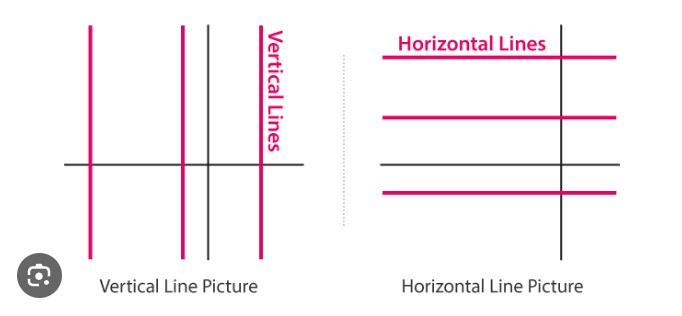

In [119]:
from IPython.display import Image, display

display(Image(r"F:\IIITBangloreAIML\PracticeNotebooksRevision\HorizontalVertical.jpg"))

#### concatenated_df = pd.concat([df1, df2], axis=0)  # Vertical (default)

axis=0 → Stack DataFrames row-wise (default)<br/>
axis=1 → Stack DataFrames column-wise

In [120]:
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Anand', 'Neel', 'Rakesh']
})

df2 = pd.DataFrame({
    'ID': [4, 5, 6],
    'Name': ['Virat', 'Ashwin', 'Guptill']
})

In [121]:
df1

,ID,Name
0,1,Anand
1,2,Neel
2,3,Rakesh


In [122]:
df2

,ID,Name
0,4,Virat
1,5,Ashwin
2,6,Guptill


In [123]:
# row wise
concatenated_row_wise = pd.concat([df1, df2], axis=0)
concatenated_row_wise

,ID,Name
0,1,Anand
1,2,Neel
2,3,Rakesh
0,4,Virat
1,5,Ashwin
2,6,Guptill


In [124]:
# col wise
concatenated_col_wise = pd.concat([df1, df2], axis=1)
concatenated_col_wise

,ID,Name,ID,Name
0,1,Anand,4,Virat
1,2,Neel,5,Ashwin
2,3,Rakesh,6,Guptill


In [125]:
df3 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Anand', 'Neel', 'Rakesh']
})

df4 = pd.DataFrame({
    'ID': [4, 5],
    'Name': ['Virat', 'Ashwin']
})

In [126]:
df3

,ID,Name
0,1,Anand
1,2,Neel
2,3,Rakesh


In [127]:
df4

,ID,Name
0,4,Virat
1,5,Ashwin


In [128]:
# col wise
concatenated_col_wise2 = pd.concat([df3, df4], axis=1)
concatenated_col_wise2

,ID,Name,ID,Name
0,1,Anand,4.0,Virat
1,2,Neel,5.0,Ashwin
2,3,Rakesh,NaN,NaN


In [129]:
# if values don't match they get replaced by NaN

### Creating, Adding, and Removing Columns in a Pandas DataFrame

In [130]:
#  Creating a Custom Column
df = pd.DataFrame({
    'Name': ['Ram', 'Shyam', 'Anthony'],
    'Math_Score': [85, 90, 78],
    'Science_Score': [88, 92, 80]
})

In [131]:
df

,Name,Math_Score,Science_Score
0,Ram,85,88
1,Shyam,90,92
2,Anthony,78,80


In [132]:
# creating a new column
df['Total_Score'] = df['Math_Score'] + df['Science_Score']

In [133]:
df

,Name,Math_Score,Science_Score,Total_Score
0,Ram,85,88,173
1,Shyam,90,92,182
2,Anthony,78,80,158


In [134]:
## Creating a Column Using a Function

In [135]:
# Categorizing students based on Total Score
df['Category'] = df['Total_Score'].transform(lambda x: 'Pass' if x >= 160 else 'Fail')

df

,Name,Math_Score,Science_Score,Total_Score,Category
0,Ram,85,88,173,Pass
1,Shyam,90,92,182,Pass
2,Anthony,78,80,158,Fail


In [136]:
# adding a same value for all rows to a column
df['School'] = 'ABC School'
df

,Name,Math_Score,Science_Score,Total_Score,Category,School
0,Ram,85,88,173,Pass,ABC School
1,Shyam,90,92,182,Pass,ABC School
2,Anthony,78,80,158,Fail,ABC School


#### Removing Columns
##### One way : df.drop(columns=['col_name'],inplace=True)
##### Deleting multiple columns : df.drop(columns = [<List of cols separated by comma ,> ,inplace=True])
##### Other way del df['col_name'] here we are using del keyword

In [137]:
# example
df.drop(columns=['Math_Score','Science_Score'],inplace=True)

df

,Name,Total_Score,Category,School
0,Ram,173,Pass,ABC School
1,Shyam,182,Pass,ABC School
2,Anthony,158,Fail,ABC School


In [138]:
# deleting using del
del df['School']

df

,Name,Total_Score,Category
0,Ram,173,Pass
1,Shyam,182,Pass
2,Anthony,158,Fail


In [139]:
# Now we want the names that contains am 
df[df['Name'].str.contains('am',case=False)]

,Name,Total_Score,Category
0,Ram,173,Pass
1,Shyam,182,Pass


## Pivot Table 

#### A Pivot Table in Pandas is a powerful tool for summarizing, aggregating, and reorganizing data. It helps in transforming data by grouping values based on specific conditions.

In [140]:
# Sample Data
dataset = {
    'Name': ['Alice', 'Bob', 'Julie', 'Alice', 'Bob', 'Julie','Alice', 'Bob', 'Julie','Alice', 'Bob', 'Julie'],
    'Subject': ['Math', 'Math', 'Math', 'Science', 'Science', 'Science','Math', 'Math', 'Math', 'Science', 'Science', 'Science'],
    'Score': [85, 90, 78, 88, 92, 80,80, 93, 70, 82, 90, 89]
}

df = pd.DataFrame(dataset)
df

,Name,Subject,Score
0,Alice,Math,85
1,Bob,Math,90
2,Julie,Math,78
3,Alice,Science,88
4,Bob,Science,92
5,Julie,Science,80
6,Alice,Math,80
7,Bob,Math,93
8,Julie,Math,70
9,Alice,Science,82


#### creating a pivot table where:

Index → Name (rows)<br/>
Columns → Subject (columns)<br/>
Values → Score (values)<br/>
Aggregation → mean<br/>

In [141]:
pivot_df = pd.pivot_table(df, values='Score', index='Name', columns='Subject', aggfunc='mean')
pivot_df

Subject,Math,Science
Name,,
Alice,82.5,85.0
Bob,91.5,91.0
Julie,74.0,84.5


In [142]:
# applying different aggregartion functions
pivot_df = pd.pivot_table(df, values='Score', index='Name', columns='Subject', aggfunc=['mean', 'sum','count'])
pivot_df

mean          sum         count        
Subject  Math Science Math Science  Math Science
Name                                            
Alice    82.5    85.0  165     170     2       2
Bob      91.5    91.0  183     182     2       2
Julie    74.0    84.5  148     169     2       2

In [143]:
# pivot table with multiple indexes
pivot_df = pd.pivot_table(df, values='Score', index=['Name', 'Subject'], aggfunc='mean')
pivot_df

Score
Name  Subject       
Alice Math      82.5
      Science   85.0
Bob   Math      91.5
      Science   91.0
Julie Math      74.0
      Science   84.5